Dataset Generation and Preprocessing

In [ ]:
#### These steps are specific to my targted NIDS and might vary depending on your targeted NIDS. 

In [9]:
import pandas as pd
import subprocess

In [ ]:
# Get identical rows from both A1 and A2

# Load the CSV files
file1 = 'notifications_inbox_A1.csv'  
file2 = 'notifications_inbox_A2.csv'  

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Save the 'FirstOccurrence' column to variables before dropping it
first_occurrence_df1 = df1['FirstOccurrence'] if 'FirstOccurrence' in df1.columns else None
first_occurrence_df2 = df2['FirstOccurrence'] if 'FirstOccurrence' in df2.columns else None

# Adjust the index of FirstOccurrence to start from 1 (if FirstOccurrence exists)
if first_occurrence_df1 is not None:
    first_occurrence_df1.index = first_occurrence_df1.index + 2
if first_occurrence_df2 is not None:
    first_occurrence_df2.index = first_occurrence_df2.index + 2

# Drop the specified columns
columns_to_drop = ['FirstOccurrence', 'Count', 'RiskScore', 'LastOccurrence', 'PCAPName']
df1.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Add a new column to each DataFrame to store the original index
df1[file1] = df1.index + 2
df2[file2] = df2.index + 2

# Drop the specified columns from both DataFrames
df_A1_dropped = df1
df_A2_dropped = df2

# Find identical rows
identical_rows = pd.merge(df1, df2, how='inner')

# Combine index columns with data from both files
identical_rows_with_indices = identical_rows.copy()

# Renaming the index columns for clarity
identical_rows_with_indices.rename(columns={
    file1: file1,
    file2: file2
}, inplace=True)

# Output the identical rows with indices to a new CSV file
identical_rows_with_indices.to_csv('identical_rows_with_data_and_indices.csv', index=False)

# Save the cleaned DataFrames back to the original CSV files
df_A1_dropped.to_csv(file1, index=False)
df_A2_dropped.to_csv(file2, index=False)

print("Identical rows with data and indices extracted to 'identical_rows_with_data_and_indices.csv'")

Identical rows with data and indices extracted to 'identical_rows_with_data_and_indices.csv'


In [ ]:
# Get identical rows from both A1 and A2

# Load the CSV files
file2 = 'notifications_inbox_A2.csv'  # Replace with your second CSV file name
identical_rows_file = 'identical_rows_with_data_and_indices.csv'

# Read the second CSV file (A2) and the identical rows file
df2 = pd.read_csv(file2)
identical_rows_with_indices = pd.read_csv(identical_rows_file)

# Add a new column to store the original index
df2[file2] = df2.index + 2

# Get the indices in 'Index in File 2' column of identical_rows_with_data_and_indices.csv
identical_indices_in_file2 = identical_rows_with_indices[file2].unique()

# Find rows in A2 that are not present in 'Index in File 2'
missing_rows = df2[~df2[file2].isin(identical_indices_in_file2)].copy()

# Filter 'FirstOccurrence' values that match the missing rows based on the original index in A2
if first_occurrence_df2 is not None:

    # Get the matching 'FirstOccurrence' values using the missing rows' index
    matching_first_occurrence = first_occurrence_df2.loc[missing_rows[file2]]

    # Insert the 'FirstOccurrence' column as the first column in missing_rows
    missing_rows.insert(0, 'FirstOccurrence', matching_first_occurrence)


# Save the extracted data to a new Excel file if it doesn't exist
output_excel_file = 'identical_rows_with_data_and_indices.xlsx'

try:
    # If the file exists, append to it and replace Sheet2 if it exists
    with pd.ExcelWriter(output_excel_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        missing_rows.to_excel(writer, sheet_name='Sheet2', index=False)
except FileNotFoundError:
    # If the file doesn't exist, create it with both sheets
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        # Write the original identical rows data to the first sheet
        identical_rows_with_indices.to_excel(writer, sheet_name='Sheet1', index=False)
        # Write the missing rows to the second sheet
        missing_rows.to_excel(writer, sheet_name='Sheet2', index=False)

print(f"Missing rows from A2 have been written to 'Sheet2' in {output_excel_file}")

Missing rows from A2 have been written to 'Sheet2' in identical_rows_with_data_and_indices.xlsx


In [ ]:
#Append missing rows from A2 to A1

# Load the CSV files
file1 = 'notifications_inbox_A1.csv'  # Replace with your first CSV file name
file2 = 'notifications_inbox_A2.csv'  # Replace with your second CSV file name

# Read the first CSV file (A1) and the second CSV file (A2)
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Add a new column to store the original index in A2
df2[file2] = df2.index + 2

# Get the indices in file2 column of identical_rows_with_data_and_indices.csv
identical_rows_file = 'identical_rows_with_data_and_indices.csv'
identical_rows_with_indices = pd.read_csv(identical_rows_file)
identical_indices_in_file2 = identical_rows_with_indices[file2].unique()

# Find rows in A2 that are not present in file2
missing_rows = df2[~df2[file2].isin(identical_indices_in_file2)].copy()

# Drop the specified columns from the missing rows
columns_to_drop = ['Count', 'RiskScore', 'LastOccurrence', 'PCAPName', 'notifications_inbox_A2.csv']
missing_rows.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Append missing rows to A1
combined_df = pd.concat([df1, missing_rows], ignore_index=True)

# Save the combined DataFrame back to the original A1 CSV file
combined_df.to_csv(file1, index=False)

print(f"Missing rows from A2 have been appended to {file1}.")

Missing rows from A2 have been appended to notifications_inbox_A1.csv.


In [ ]:
#### Add Predictions to A1

# Load the CSV files
file1 = 'notifications_inbox_A1.csv'  # Replace with your first CSV file name
file2 = 'notifications_inbox_A2.csv'  # Replace with your second CSV file name

# Read the first CSV file (A1) and the second CSV file (A2)
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Define columns to drop
columns_to_drop = ['FirstOccurrence', 'Count', 'RiskScore', 'LastOccurrence', 'PCAPName']

# Drop unnecessary columns before merging
df1.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Create a 'predictions' column initialized to 0
df1['predictions'] = 0

# Set the value to 1 if the row in A1 is present in A2
# Using merge to identify matching rows
merged = df1.merge(df2, how='left', indicator=True)

# Set predictions to 1 for rows present in A2
df1['predictions'] = (merged['_merge'] == 'both').astype(int)

# Save the updated DataFrame back to the original A1 CSV file
df1.to_csv(file1, index=False)

#Save A2 after dropping columns
df2.to_csv(file2, index=False)

print(f"The 'predictions' column has been added to {file1}.")

: 

In [7]:
predictions_count = df1['predictions'].value_counts()

# Print the counts
print("Count of predictions:")
print(predictions_count)

Count of predictions:
predictions
0    490
1    113
Name: count, dtype: int64


In [22]:
# Load the CSV file
file1 = 'notifications_inbox_A1.csv'  # Replace with your first CSV file name

# Read the first CSV file (A1)
df1 = pd.read_csv(file1)

# Drop the 'notifications_inbox_A2.csv' column
df1.drop(columns=['notifications_inbox_A1.csv'], inplace=True, errors='ignore')

# Save the updated DataFrame back to the CSV file
df1.to_csv(file1, index=False)

print(f"The 'notifications_inbox_A2.csv' column has been dropped from {file1}.")

The 'notifications_inbox_A2.csv' column has been dropped from notifications_inbox_A1.csv.


In [3]:
import pandas as pd

# Load the CSV files
A1 = pd.read_csv('notifications_test_occurrences.csv')
A2 = pd.read_csv('features.csv')

# Group by Packet Number and take the maximum prediction for each Packet Number
A1_max_predictions = A1.groupby('Packet Number')['predictions'].max().reset_index()
print(A1_max_predictions)


KeyError: 'Column not found: predictions'

In [2]:
# Create a dictionary to map Packet Numbers to their maximum Predictions
predictions_map = dict(zip(A1_max_predictions['Packet Number'], A1_max_predictions['predictions']))

# Print the dictionary
print("Packet Number to Maximum Prediction Mapping:")
print(predictions_map)

Packet Number to Maximum Prediction Mapping:
{1: 0, 9: 0, 26: 0, 41: 1, 44: 0, 45: 0, 48: 0, 91: 0, 93: 0, 94: 0, 95: 1, 98: 0, 109: 0, 110: 0, 113: 0, 116: 0, 120: 1, 124: 1, 127: 1, 135: 1, 162: 0, 173: 0, 176: 0, 177: 0, 178: 0, 203: 0, 209: 0, 239: 0, 263: 0, 264: 0, 270: 0, 271: 0, 290: 0, 291: 0, 292: 0, 293: 0, 328: 0, 332: 0, 936: 0, 953: 0, 1040: 0, 1118: 0, 1287: 0, 1472: 1, 1848: 0, 1912: 1, 1913: 0, 1914: 0, 1915: 0, 1920: 0, 1921: 0, 1922: 0, 1928: 0, 1943: 0, 1945: 0, 1953: 0, 1966: 0, 2131: 0, 2249: 0, 2350: 0, 2403: 0, 2407: 0, 2427: 0, 2550: 0, 2624: 0, 2631: 0, 2633: 0, 2634: 0, 2637: 0, 2638: 0, 2643: 0, 2650: 0, 2661: 0, 2673: 0, 2682: 0, 2717: 0, 2721: 0, 2722: 0, 2736: 0, 2740: 0, 2757: 0, 2765: 0, 2847: 0, 2853: 0, 2857: 0, 3249: 0, 3256: 0, 3296: 0, 11170: 0, 12324: 0, 13956: 0, 18863: 0, 18880: 0, 30946: 0, 35187: 0, 125973: 0, 125990: 0, 208951: 0, 208971: 0, 466669: 0, 535169: 0, 3100001: 1, 3100003: 1, 3100005: 0, 3102994: 1, 3102996: 1, 3103015: 1, 3103053:

In [5]:
# Map the maximum prediction for each Frame Number in A2 using the Packet Number from A1
A2['Predictions'] = A2['frame.number'].map(predictions_map)

# # Fill NaN values with 0 for frames that don't have corresponding packet numbers in A1
# A2['Predictions'] = A2['Predictions'].fillna(0).astype(int)

# Save the updated A2 to a new CSV file
A2.to_csv('features_with_max_predictions.csv', index=False)

print("Predictions added to A2 and saved as A2_with_max_predictions.csv")

Predictions added to A2 and saved as A2_with_max_predictions.csv


In [6]:
import pandas as pd

# Load the CSV file
file_path = 'notifications_inbox_A1_packet_numbers.csv'
df = pd.read_csv(file_path)

# Define the ground truth function
def assign_ground_truth(packet_number):
    if (3102996 <= packet_number <= 3632633 or
        4477319 <= packet_number <= 4775277 or
        5447221 <= packet_number <= 5566315 or
        5630397 <= packet_number <= 6238671 or
        7932521 <= packet_number <= 8680503 or
        9542672 <= packet_number <= 11005350 or
        12554874 <= packet_number <= 13842792 or
        13842803 <= packet_number <= 14595720 or
        14646469 <= packet_number <= 16663842 or
        16663945 <= packet_number <= 18484190):
        return 1
    else:
        return 0

# Apply the function to assign ground truth values
df['ground_truth'] = df['Packet Number'].apply(assign_ground_truth)

# Save the updated CSV
output_file_path = 'notifications_inbox_packet_numbers_with_ground_truth.csv'
df.to_csv(output_file_path, index=False)


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('notifications_inbox_A2_packet_numbers.csv')

# Filter the DataFrame to remove unwanted rows
df = df[~df['Type'].isin(['THROUGHPUT_VARIANCE_LIMIT_EXCEEDED', 'UDP_PORT_SCAN', 'CYCLIC_MESSAGE_OUT_OF_ORDER'])]

# Save the modified DataFrame back to the CSV file
df.to_csv('notifications_inbox_A2_packet_numbers_1.csv', index=False)

In [ ]:
import pandas as pd

# Load the CSV file
test_df = pd.read_csv("features.csv")

# Check the data type of the 'Packets' column
print(test_df['frame.number'].dtype)

# Check the data type of each element in the 'Packets' column
for index, row in test_df.iterrows():
    print(f"Row {index + 1}: {type(row['frame.number'])}, Value: {row['frame.number']}")

In [ ]:
### Features_1 - 1st Occurrence

# import pandas as pd

# # Load the CSV files
# features_df = pd.read_csv("features_1.csv")
# test_df = pd.read_csv("notifications_inbox_A1_packet_numbers.csv")
# a2_df = pd.read_csv("notifications_inbox_A2_packet_numbers_1.csv")

# # Convert packet numbers from A2.csv and test.csv to sets for faster lookup
# a2_packets = set(a2_df['Packet Number'])
# test_packets = set(test_df['Packet Number'])

# # Create a new column 'Predictions' in features.csv with default value 0
# features_df['Predictions'] = 0

# # Find packet numbers common between A2.csv and notifications_test_occurrences.csv
# common_packets = a2_packets.intersection(test_packets)

# # Update 'Predictions' in features.csv for rows where frame.number is in the common packets
# features_df.loc[features_df['frame.number'].isin(common_packets), 'Predictions'] = 1

# # Save the updated features.csv
# features_df.to_csv("dataset_1.csv", index=False)

In [ ]:
### Features_5 - 5 Occurrences

# import pandas as pd

# # Load the CSV files
# features_df = pd.read_csv("features_5.csv")
# test_df = pd.read_csv("packets_list_5.csv")
# a2_df = pd.read_csv("notifications_inbox_A2_packet_numbers_1.csv")

# # Convert 'Packets' column from string representations to lists of integers
# test_df['Packets'] = test_df['Packets'].apply(lambda x: list(map(int, eval(x))) if isinstance(x, str) else x)

# # Convert packet number in A2.csv to a set for faster lookup
# a2_packets = set(a2_df['Packet Number'])

# # Create a new column 'predictions' in features.csv with default 0
# features_df['Predictions'] = 0

# # Process each row in test.csv
# for _, row in test_df.iterrows():
#     packet_list = row['Packets']
#     if packet_list[0] in a2_packets:  # Check if the first element is in A2.csv
#         # Update 'predictions' in features.csv for all packets in the list
#         features_df.loc[features_df['frame.number'].isin(packet_list), 'Predictions'] = 1

# # Save the updated features.csv
# features_df.to_csv("dataset_5.csv", index=False)

In [ ]:
### Features_10 - 10 Occurrences
## Append predictions to features_10.csv to get dtataset_10.csv (complete dataset with predictions for multiple occurrences packets)
import pandas as pd

# Load the CSV files
features_df = pd.read_csv("features_10.csv")
test_df = pd.read_csv("packets_list_10.csv")
a2_df = pd.read_csv("notifications_inbox_A2_packet_numbers_1.csv")

# Convert 'Packets' column from string representations to lists of integers
test_df['Packets'] = test_df['Packets'].apply(lambda x: list(map(int, eval(x))) if isinstance(x, str) else x)

# Convert packet number in A2.csv to a set for faster lookup
a2_packets = set(a2_df['Packet Number'])

# Create a new column 'predictions' in features.csv with default 0
features_df['Predictions'] = 0

# Process each row in test_df
for _, row in test_df.iterrows():
    packet_list = row['Packets']
    if packet_list[0] in a2_packets:  # Check if the first element is in A2.csv
        # Update 'predictions' in features.csv for all packets in the list
        features_df.loc[features_df['frame.number'].isin(packet_list), 'Predictions'] = 1

# Save the updated features.csv
features_df.to_csv("dataset_10.csv", index=False)

Accuracy: 0.8493
Precision: 0.3636
Recall: 0.9231


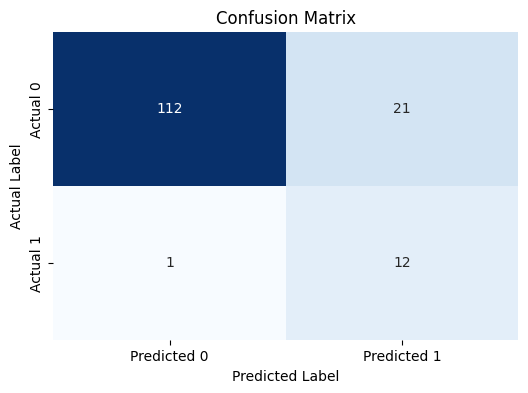

In [ ]:
######## NIDS Metrics 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the CSV file
df = pd.read_csv('dataset_1.csv')

# Assuming the file has 'ground_truth' and 'prediction' columns
y_true = df['ground_truth']
y_pred = df['Predictions']

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy: 0.8163
Precision: 0.4969
Recall: 0.7864


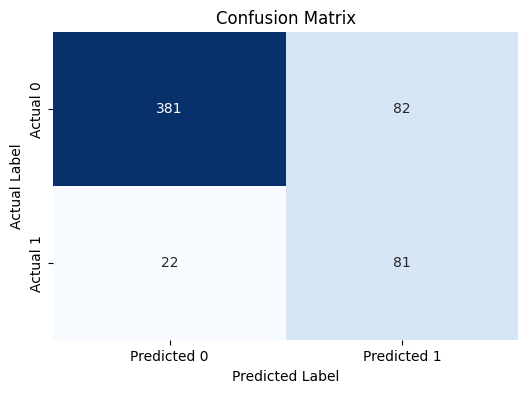

In [ ]:
######## NIDS Metrics 5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the CSV file
df = pd.read_csv('dataset_5.csv')

# Assuming the file has 'ground_truth' and 'prediction' columns
y_true = df['ground_truth']
y_pred = df['Predictions']

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy: 0.7929
Precision: 0.4861
Recall: 0.7143


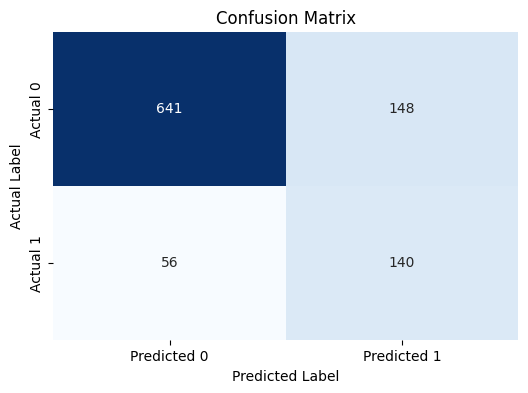

In [ ]:
######## NIDS Metrics 10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the CSV file
df = pd.read_csv('dataset_10.csv')

# Assuming the file has 'ground_truth' and 'prediction' columns
y_true = df['ground_truth']
y_pred = df['Predictions']

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Accuracy: 0.8264
Precision: 0.6944
Recall: 0.7067


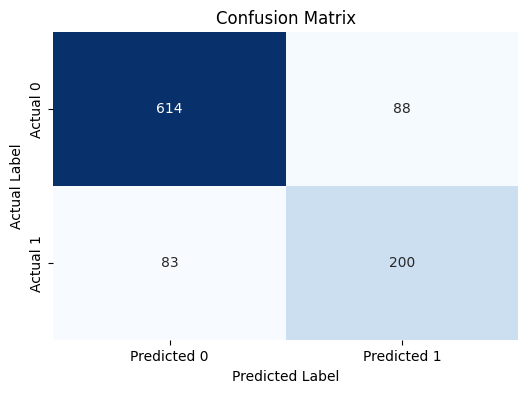

In [ ]:
######## NIDS Metrics 10 with updated ground truth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the CSV file
df = pd.read_csv('dataset_10_c.csv')

# Assuming the file has 'ground_truth' and 'prediction' columns
y_true = df['ground_truth']
y_pred = df['Predictions']

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
import pandas as pd

# Load the CSV file
file_path = 'features_with_max_predictions.csv'
df = pd.read_csv(file_path)

predictions_count = df['Predictions'].value_counts()

# Print the counts
print("Count of predictions:")
print(predictions_count)

# Extract rows where the predictions column is 0
df_zero_predictions = df[df['Predictions'] == 0]

df_zero_predictions = df_zero_predictions.drop(columns=['ground_truth', 'frame.number'])

# Save the extracted rows to a new CSV file
output_file_path = 'zero_predictions_rows.csv'
df_zero_predictions.to_csv(output_file_path, index=False)

# Print the output file path
print(f"Extracted rows saved to: {output_file_path}")

Count of predictions:
Predictions
0    97
1    40
Name: count, dtype: int64
Extracted rows saved to: zero_predictions_rows.csv


In [19]:
import pandas as pd

# Load the CSV file
file_path = 'notifications_inbox_A1.csv'
df = pd.read_csv(file_path)

predictions_count = df['predictions'].value_counts()

# Print the counts
print("Count of predictions:")
print(predictions_count)

# Extract rows where the predictions column is 0
df_zero_predictions = df[df['predictions'] == 0]

# df_zero_predictions = df_zero_predictions.drop(columns=['ground_truth', 'frame.number'])

# Save the extracted rows to a new CSV file
output_file_path = 'A1_zero_predictions_rows.csv'
df_zero_predictions.to_csv(output_file_path, index=False)

# Print the output file path
print(f"Extracted rows saved to: {output_file_path}")

Count of predictions:
predictions
0    490
1    113
Name: count, dtype: int64
Extracted rows saved to: A1_zero_predictions_rows.csv


In [11]:
dataset_10 = pd.read_csv('dataset_10.csv')
dataset_1 = pd.read_csv('dataset_1.csv')

In [12]:
subtracted_rows = dataset_10[dataset_10['frame.number'].isin(dataset_1['frame.number'])]

In [13]:
dataset_train = dataset_10[~dataset_10['frame.number'].isin(dataset_1['frame.number'])]

In [14]:
dataset_train.to_csv('dataset_train.csv', index=False)

In [15]:
print("Subtracted rows:")
print(subtracted_rows)

Subtracted rows:
     frame.number  protocol               function            eth.src  \
0               1  Profinet                      0  54:e3:b0:00:55:b7   
1               2  Profinet                      0  ac:64:17:03:4f:c5   
8               9      LLDP          CLIENT REPORT  54:e3:b0:00:55:b2   
21             26      LLDP          CLIENT REPORT  54:e3:b0:00:55:b8   
22             41  Profinet     PN DCP SET REQUEST  28:63:36:9a:90:b3   
..            ...       ...                    ...                ...   
710       5447323        S7              PLUS_DATA  18:db:f2:38:71:39   
711       5449747        S7             STATE LIST  18:db:f2:38:71:39   
731       5566308  Profinet   DCE RPC READ REQUEST  28:63:36:a9:ac:eb   
732       5566315  Profinet  DCE RPC READ RESPONSE  00:30:de:41:df:28   
770       7973675       ARP                REQUEST  18:db:f2:38:71:39   

               eth.dst          ip.src         ip.dst tcp.flags_ack  \
0    ac:64:17:03:4f:c5             

In [3]:
# Update ground truth
import pandas as pd

# Load the CSV file
file_path = 'dataset_10.csv'
df = pd.read_csv(file_path)

# Define the ground truth function
def assign_ground_truth(packet_number):
    if (3102994 <= packet_number <= 3632633 or
        4477319 <= packet_number <= 4775277 or
        5447219 <= packet_number <= 5566315 or
        5630397 <= packet_number <= 6238671 or
        6278770 <= packet_number <= 6278787 or
        7932510 <= packet_number <= 8680522 or
        9542662 <= packet_number <= 11005378 or
        12554864 <= packet_number <= 13842792 or
        13842803 <= packet_number <= 14595720 or
        14646469 <= packet_number <= 16663842 or
        16663945 <= packet_number <= 18484190):
        return 1
    else:
        return 0

# Apply the function to assign ground truth values
df['ground_truth'] = df['frame.number'].apply(assign_ground_truth)

# Save the updated CSV
output_file_path = 'dataset_10.csv'
df.to_csv(output_file_path, index=False)

In [ ]:
# Create eval.pcap from dataset_eval
csv_file = "dataset_eval.csv"
pcap_file = "filtered_attack.pcap"
output_pcap = "eval.pcap"

# Load frame numbers from CSV
df_pcap = pd.read_csv(csv_file)
frame_numbers = df_pcap["frame.number"].astype(str).tolist()

# Get the last frame number
end_frame = frame_numbers[-1]
# print(f"Last frame number: {end_frame}")

# Create display filter for Wireshark
frame_filter = " || ".join(f"frame.number == {fn}" for fn in frame_numbers)
# print(len(frame_numbers))

# Use tshark to extract packets
command = [
    "tshark", "-r", pcap_file, "-Y", frame_filter, "-w", output_pcap
]
subprocess.run(command)

print(f"Extracted packets saved in {output_pcap}")

Extracted packets saved in eval.pcap


In [ ]:
## Get predictions for the perturbations.csv

import pandas as pd

# Load the CSV files
notifications_df = pd.read_csv('notifications_inbox_perturbations_packet_numbers_after_noti_removal.csv')
perturbations_df = pd.read_csv('perturbations_2.csv')

# Get the 'Packet Number' values from notifications_inbox_perturbations.csv
packet_numbers = notifications_df['Packet Number'].tolist()

perturbations_df["Predictions_2"] = 0

# Set 'predictions' column to 1 for matching packet numbers in perturbations.csv
# perturbations_df.loc[perturbations_df.index.isin(packet_numbers), 'Predictions_2'] = 1

perturbations_df.loc[perturbations_df.index.isin([num - 1 for num in packet_numbers]), 'Predictions_2'] = 1

# Save the modified perturbations.csv
perturbations_df.to_csv('perturbations_2.csv', index=False)

In [3]:
# get the attack and normal data percentage from the dataset
import pandas as pd

# Load the dataset
df_count = pd.read_csv("dataset_eval.csv")

# Count occurrences of 0 and 1 in the ground_truth column
counts = df_count["ground_truth"].value_counts()

total = len(df_count)
total_columns = len(df_count.columns)

# Print results
count_0 = counts.get(0, 0)
count_1 = counts.get(1, 0)

percentage_0 = (count_0 / total) * 100
percentage_1 = (count_1 / total) * 100

print(f"Total Columns: {total_columns}")
print(f"Count of 0: {count_0} ({percentage_0:.2f}%)")
print(f"Count of 1: {count_1} ({percentage_1:.2f}%)")


Total Columns: 33
Count of 0: 123 (84.25%)
Count of 1: 23 (15.75%)


In [4]:
import pandas as pd

# Load CSV files
A1 = pd.read_csv("notifications_inbox_eval_packet_numbers_after_noti_removal.csv")
A2 = pd.read_csv("notifications_inbox_perturbations_packet_numbers_after_noti_removal.csv")

# Merge with indicator to find differences
diff = A1.merge(A2, how="left", indicator=True)

# Extract rows only in A1
A1_not_in_A2 = diff[diff["_merge"] == "left_only"].drop(columns=["_merge"])

# Save the result
A1_not_in_A2.to_csv("Notifications_Avoided.csv", index=False)

print("Extraction complete. Saved as 'Notifications_Avoided.csv'.")

Extraction complete. Saved as 'Notifications_Avoided.csv'.
